<h1 style="font-size:160%; text-align:center;">OLIVE TREE DISEASE DETECTION</h1>

<HR WIDTH="40%" ALIGN=CENTER>

<center><b>Author:</b> Raghad Ibrahim <br>
<b>Date:</b> April 2, 2024 <br>
<b>Topic:</b> Olive Trees Disease Diagnostics  </center>
    <HR WIDTH="40%" ALIGN=CENTER>

<center><b>Abstract</b></center><br>

 The Olive Tree, an ancient symbol of peace and endurance, holds significant cultural and agricultural importance across the Mediterranean region and beyond. The production of olive oil is facing a significant threat nowadays due to climate change and the spread of diseases. This project explores the application of computer vision techniques for the analysis and classification of leaf images to identify potential diseases or health issues. The dataset used in this paper consists of images of leaves from three classes: healthy leaves, leaves infected with Aculus Olearius disease, and leaves affected by Peacock Spot disease. The goal is to develop an image classification model capable of accurately distinguishing between these classes based on features extracted from the images. Overall, this project aims to contribute to the field of agricultural diagnostics by providing a reliable tool for automated detection and classification of leaf diseases.



### Table of Content

<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART I: Project Overview</p></i>

> **1. [Introduction](#intro)**
	> > 1.1. [Objectives](#1.1)  
	> > 1.2. [Literature Review](#1.2)
>
<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART II: Data Analysis</p></i>
> 
> **2. [Methodology](#methodology)**
	> > 2.1 [Approach](#2.1)   
	> > 2.2 [Data Collection](#2.2)     
	> > 2.3 [Dependencies](#2.3)   
	> > 2.4 [Getting Started](#2.4)
>
> **3. [Data Preprocessing](#preprocessing)**
	> > 3.1 [A First Look At The Data](#3.1)  
	> > 3.2 [Identifying Image Imbalance](#3.2)  
	> > 3.3 [Plotting Image Size](#3.3)     
>
> **4. [Exploratory Data Analysis](#eda)**   
> > 4.1. [Orientation](#4.1)  
> > 4.2. [RGB Channels](#4.2)  
>
> **5. [Modeling and Evaluation](#model_eval)**
>
<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART III: Findings</p></i>
> 
> **6. [Results](#results)**  
> **7. [Discussion](#discussion)**  
> **8. [Conclusion](#conclusion)**  
    </font>

<hr>

*PART I: Project Overview* 
<a id='intro'></a>
## Introduction

<p  style="text-indent: 25px;"> WORDS.  Olive trees can be affected by a number of diseases that can be identified in various ways, most of which involve a lot of effort and specilization.</p>


<a id='1.1'></a>
### Objectives:

The project is driven by the following objectives:

- more words
- To establish and evaluate machine learning models for classifying the leaf images into the three categories.


<a id='1.2'></a>
### Literature Review:

Olive trees can get sick with some conditions that affect its health and can be deetected through its leaves. These conditions include the following diseases: Aculus Olearius and Peacock Spot. Aculus Olearius is a condition that affects olive leaves and causes discoloration in its leaf.

 <hr>   
	
 *PART II: Data Analysis* 

<a id='methodology'></a>
## Methodology 

<a id='2.1'></a>
### Approach

#### Image Composition and Pixels

( edit the words :) )In digital imaging, every image is composed of a matrix of pixels, each representing the smallest unit of the image. For instance, an image with dimensions of 600x800 is constructed from 480,000 individual pixels, arranged in a grid of 600 pixels vertically and 800 pixels horizontally. Each pixel is essentially as a tiny square with a specific color, contributing to the overall image when viewed collectively.


#### RGB Channels

( edit the words :) )The diversity of colors displayed by these pixels can be described by the RGB Color Model, which is the foundational principle in representing digital images. The RGB Color Model operates on the premise that any visible color is just a precise combination of varying intensities (0 to 255) of red, green, and blue light. Here, a value of 0 denotes the absence of light, resulting in complete darkness, whereas a value of 255 represents the maximum brightness of the color. By adjusting the intensity levels of these three primary colors, the RGB model can generate a wide spectrum of colors, enabling digital devices to reproduce nearly any color perceivable by the human eye.

#### Image Analysis Using RGB Channels 
( edit the words :) ) In a digital image, each pixel is assigned a single color, which by the RGB model can be broken down into a precise combination of Red, Green, and Blue. In other words, every pixel, which we consider the row value has three features that can be used as columns. This way we can view each image as a unique dataset whose rows represent the individual pixels and columns represent the unique color combination consisting of the various intensities of Red, Green. amd Blue..

<a id='2.2'></a>
### Data Collection

For this project I have used a public dataset to build a model that can detect various diseases in Olive leaves. The dataset consists of over 3,400 
images of olive leaves collected from Denizli City, Turkey. The images are classified into the following classes:  

- Olive Leaves infected with Aculus Olearius.
- Olive Leaves infected with Peacock Spot.
- Healthy Olive Leaves.


<a id='2.3'></a>
### Dependencies

We will start off by importing some libraries such as Pandas, Numpy, and Seaborn. 

In [27]:
## IMPORT LIBRARIES ##

import numpy as np #numpy for 

import pandas as pd # pandas

from matplotlib import pyplot as plt # matplot library
import seaborn as sns

In [2]:
## IMPORT LIBRARIES ##

import os  
from matplotlib import image as mpimg
from random import randint
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
from glob import glob
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

##########

<a id='2.4'></a>
### Getting Started

The `os` library gives us access to the file system. I will be using the `os` library to load the images as seen below:

In [3]:
## importing `os` library ##

import os                              

In [4]:
## Load the image directories ##

dir = 'dataset' # paste your folder directory

# returns a list containing the names of the images in the `healthy` folder
healthy_data= os.listdir(dir + '/healthy') 

# returns a list containing the names of the images in the a`culus olearius` folder
aculus_olearius_data= os.listdir(dir + '/aculus_olearius') 

#returns a list containing the names of the images in the `peacock spot` folder
peacock_disease_data= os.listdir(dir + '/peacock_disease') 

all_data = [healthy_data, aculus_olearius_data, peacock_disease_data]

##########

Now that the dataset has been successfully loaded from the corresponding directories, we can proceed with the analysis. 
<br><br>

<hr>

 *PART II: Data Analysis*  

 <a id='preprocessing'></a>
## Data Preprocessing

The process of analyzing the dataset involves some Preprocessing before building the model itself.


<a id='3.1'></a>
### A First Look At The Data

We can start off by taking a look at the data we are working with. Since the dataset constitutes of thousands images for each of the three states of an olive leaf (just in this dataset and not ever) that we are trying to detect: a healthy leaf, a leaf infected with Aculus Olearius, and a leaf infected with Peacock Spot Disease. 

To do this, we will display a small sample of each class to get an idea of the images in that group. This can be done through examine a random sample of the images from each of the three classes, starting with the healthy leaves followed by leaves infected with Aculus olearius disease and finally leaves infected with peacock spot disease.

First, let's take a look at a sample of images from Class 0: 

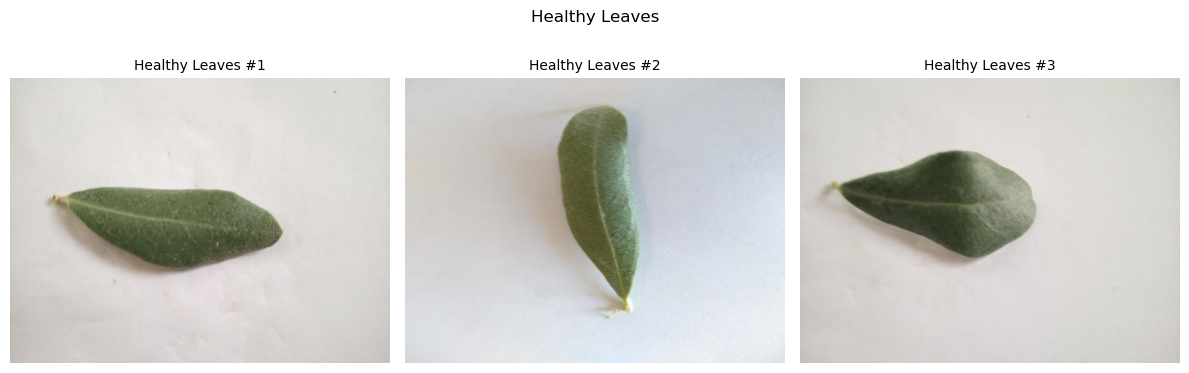

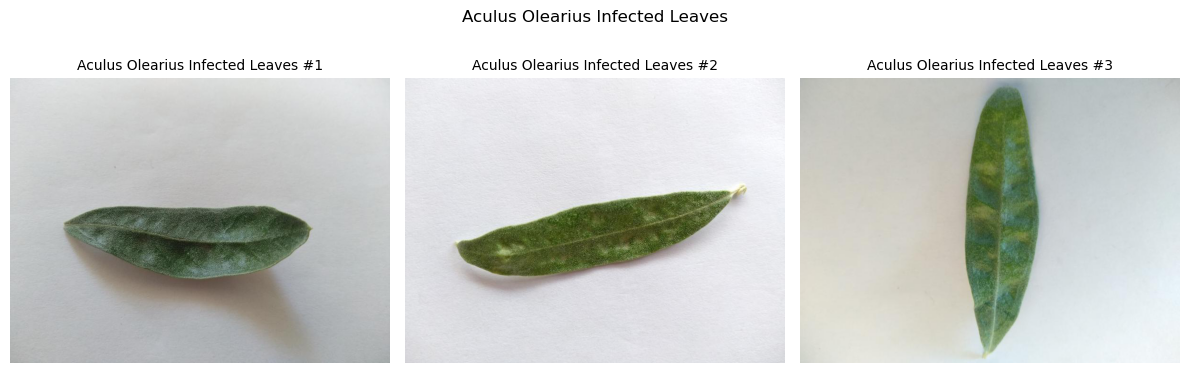

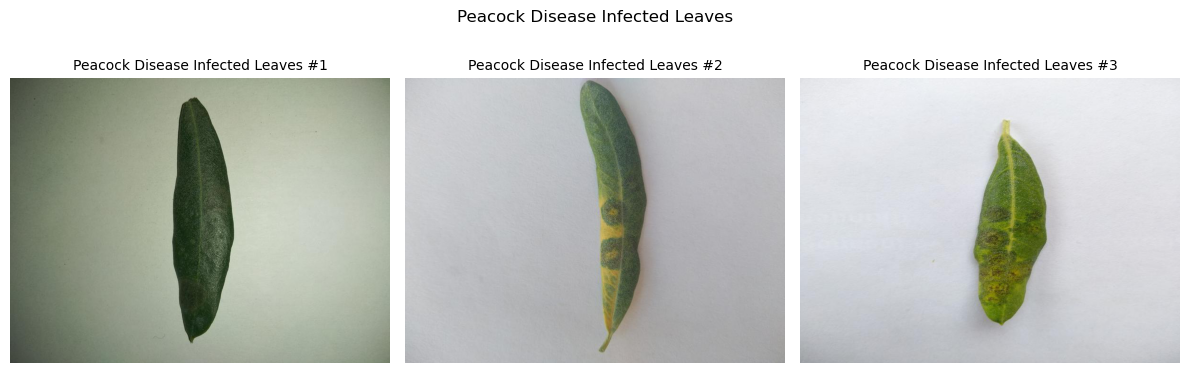

In [5]:
########################################################################
## DISPLAY A RANDOM SAMPLE OF THREE IMAGES FROM THE DIFFERENT CLASSES ##
########################################################################


# STEP 1: Initialize a dictionary with class names as keys and directory path values

class_directories = {
    'Healthy Leaves': os.path.join(dir, 'healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Infected Leaves': os.path.join(dir, 'aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Infected Leaves': os.path.join(dir, 'peacock_disease') # Path to the directory containing images with Peacock Spot Leaves
}


# STEP 2: Loop through each class to generate and plot samples

for class_name, directory in class_directories.items():
    
    # Get all image filenames for the current class
    all_images = os.listdir(directory)
    # Randomly select a sample of images
    selected_images = np.random.choice(all_images, 3, replace=False)

    # Set up a subplot grid for the current class
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Loop through the selected images to display them
    for i, image_name in enumerate(selected_images):
        # Construct the path to the image file
        img_path = os.path.join(directory, image_name)
        image = Image.open(img_path)  # Open the image

        # Display the image in the subplot
        axs[i].imshow(image)
        # Set the title for each subplot
        axs[i].set_title(f"{class_name} #{i+1}", fontsize=10)
        # Remove axis ticks
        axs[i].axis('off')

    # Display the plot for the current class
    plt.suptitle(class_name, fontsize=12)  # Set title for the entire plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

####

#### Obsevations:  

- We see that the leaves display a visible difference to the human eye.

<a id='3.2'></a>
### Identifying Image Imbalance

The first step is to identify whether our dataset has any class imbalance in terms of the number of images each one has. To do this, we’re going to find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalance. Imbalance could result in poor performance for the class with less representation, impacting overall performance of the models later on.


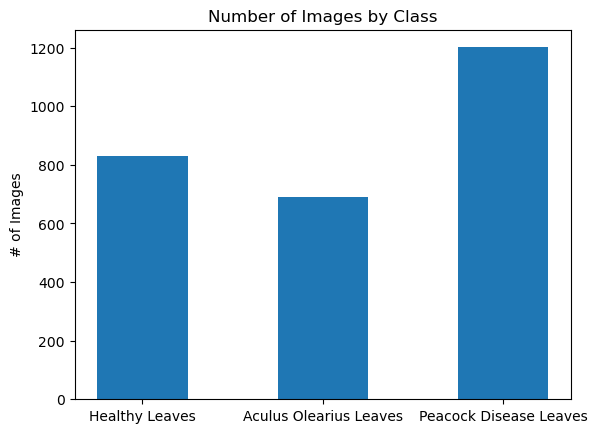

In [6]:
######################################################################
## BAR CHART TO VISUALIZE THE DISTRIBUTION OF IMAGES ACROSS CLASSES ##
######################################################################


## STEP 1: Initialize a dictionary with class names as keys and the number of images in each class as values


data_directories = {
    'Healthy Leaves': healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': aculus_olearius_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': peacock_disease_data # Path to the directory containing images with Peacock Spot Leaves
}

## STEP 2: Find the number of images in each class

leng = [len(data_directories['Healthy Leaves']), len(data_directories['Aculus Olearius Leaves']), len(data_directories['Peacock Disease Leaves'])]


## STEP 3: Plot the number of images for each class using a bar chart

plt.bar(data_directories.keys(), leng , width = .5)  # (x,y) = (class name, mumber of images)
plt.title("Number of Images by Class")  # Title of the plot
plt.ylabel('# of Images')  # Label for the y-axis
plt.show()  # Displays the plot

####

#### Observations: 

- We have a clear imbalance in the dataset with significantly more images in Class 2 followed by Class 0 and then Class 1 which falls slighly below Class 0.

  <HR WIDTH="30%" ALIGN=LEFT>

<a id='3.3'></a>
### Plotting Image Size

It is important that we maintain a consistent image size throughout the different classes in our dataset to avoid mismatched matrices when we start modeling. We can visualize the raw image size in each class using a scatter plot as seen below. 






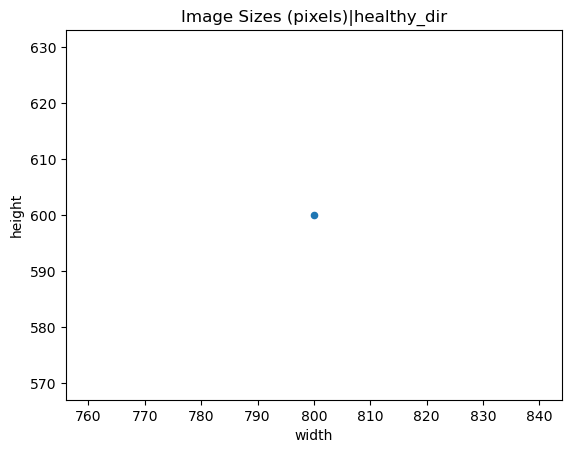

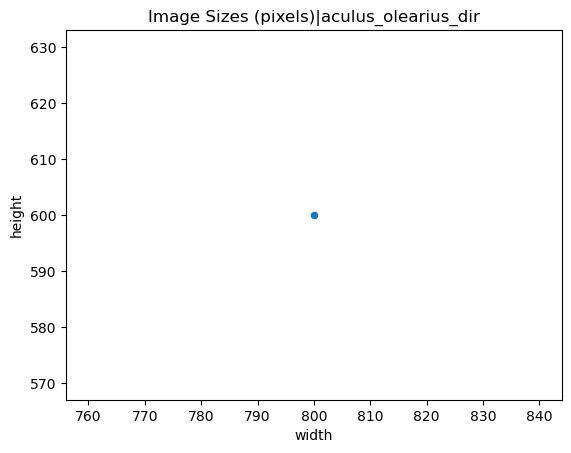

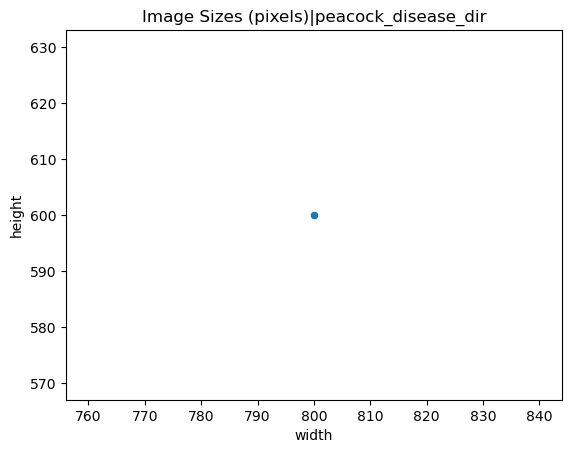

In [7]:
######################################################################
## PLOTTING THE DISTRIBUTION OF DIMENSIONS FOR EACH CLASS OF IMAGES ##
######################################################################

## STEP 1: Define a dictionary with directory names for each class of images

train_dir = {
    'healthy_dir': os.path.join(dir, 'healthy/'), # Path to the directory containing healthy leaf images
    'aculus_olearius_dir': os.path.join(dir, 'aculus_olearius/'), # Path to the directory with aculus olearius infected leaf images
    'peacock_disease_dir': os.path.join(dir, 'peacock_disease/')  # Path to the directory of leaves with peacock disease
}

## STEP 2: Loop through each directory in the dictionary

for name, directory in train_dir.items():
    
    # List all files in the current directory
    filelist = [os.path.join(directory, f) for f in os.listdir(directory)] 
    
    # Initialize lists to store the heights and widths of images
    heights = [] # list to store the height of each image
    widths = [] # list to store the width of each image

## STEP 3: Loop over each file in the directory
   
    for file in filelist:
        
        try:
            img = mpimg.imread(file) # Attempt to read the image file
        except:
            continue # If reading the image fails, skip to the next file
            
        # Extract the height and width of the current image     
        h = img.shape[0] # image height
        w = img.shape[1] # image width

        # Append the image's dimensions to the respective lists
        heights.append(h)
        widths.append(w)

## STEP 4:
    
    # Create a DataFrame from the collected image dimensions
    dim_df = pd.DataFrame({'height': heights, 'width': widths})
    
    # Group the dimensions to count the occurrence of each size combination    
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    
    # Plot
    sizes.plot.scatter(x='width', y='height',) # scatter plot where x-axis represents width and y-axis is height
    plt.title(f'Image Sizes (pixels)|{name}') # set the title of the plot to indicate the class of images being plotted
    plt.show()  # display plot for each class

####

#### Obsevations:  

We can see above displayed by the single point in each plot that all our images in the three classes are in fact the same size: $600*800$ pixels. This means that every image has a height made up of $600$ pixels and a width of $800$ pixels.   <br>

### Key Insights of the Preprocessing Stage

<hr>

 *PART II: Data Analysis* 

<a id='eda'></a>
## Data Exploratory Analysis

In this phase we will be exploring the image dataset in depth words words
In the Exploratory Data Analysis (EDA) phase of this project, a key focus was to examine the dataset in depth for any potential biases or artifacts that could mistakenly be interpreted as distinguishing features by the machine learning models. 

<HR WIDTH="30%" ALIGN=LEFT>

<a id='4.1'></a>
### Orientation

(fix the words words) A notable concern is the orientation of the olive leaves within the images, which can be mistakenly extracted as a feature by the predictive models later on. To eliminate any potential bias that could impact the model's ability to generalize, it is imperative to ensure that the dataset displayed a sufficient variation in leaf orientation. 

To mitigate this risk, we must carefully inspect and ensure similar variation in the leaf orientation across the three classes. The method chosen to do this is by finding the slope of a leaf within an image, which involves a lengthy process summarized below: 

1. Flatten an image
2. Apply KMeans to segment an image into two clusters: the leaf and the background
3. Crop the image down to show just the leaf
4. Find the slope
5. 

First I will illustrate the process by doing it on a single image from the dataset and then I will apply the process on the entire dataset by iterating across the classes.

#### On a sample

(600, 800, 3)

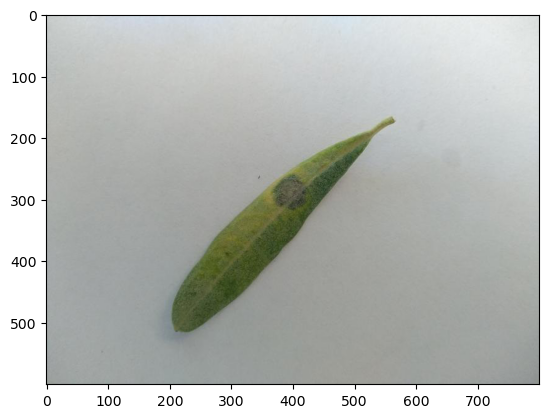

In [8]:
#########################################
## GENERATE ANY IMAGE FROM THE DATASET ##
#########################################


img_ex = mpimg.imread(dir + '/peacock_disease/' + peacock_disease_data[9]) # Read an image from the specified directory and file name

plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

For this we will be using the `KMeans` library from `sklearn.cluster` which we will import below:

In [9]:
## IMPORT LIBRARY##

from sklearn.cluster import KMeans 

Before running the K-Means mode, we must reshape the image from its current dimensions $600*800*3$ into a 2D array where each row representsa pixel and the colums represent the RGB channels. Since we have $600*800*$ pixels, we expect to see $480000$ pixels as our row value and $3$ for our column valur representing the three color channels.

In [10]:
## RESHAPE THE IMAGE ##

flat_image = img_ex.reshape(-1, 3) # The '-1' in the reshape method automatically calculates number of pixels in the image

# SANITY CHECK
flat_image.shape

(480000, 3)

Now we can start the process of applying the K-Means clustering algorithm to an image for segmentation, aiming to differentiate between two primary features or segments within the image.This line trains the KMeans model using the RGB values of every pixel in the image. The model will the two clusters to distinguish between the two primary colors/clusters in the image. 


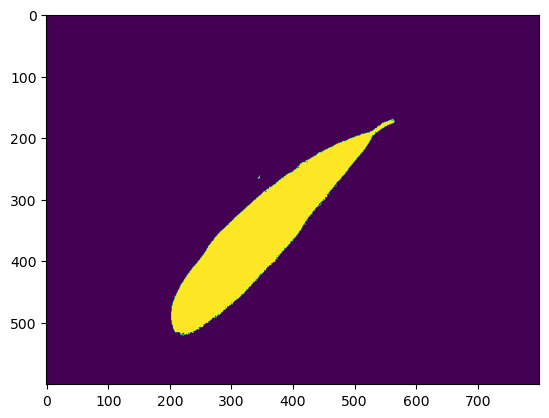

In [11]:
###################
## K-MEANS MODEL ##
###################


## STEP 1: Instantiate the K-MEANS Model 

kmeans = KMeans(n_clusters=2, random_state=123) # 2 clusters to segment the image into leaf and background
kmeans.fit(flat_image) # Fit the K-Means model on the flattened image data
labels = kmeans.predict(flat_image) # Predict the labels for each pixel in the image
label_img = labels.reshape(600,800) # Reshape the labels back into the original image dimensions


## STEP 2: Ensure that the leaf is consistently labeled as 1 across runs

if labels.sum() > (1-labels).sum():
   labels = 1 - labels


## STEP 2: Display the image

plt.figure() # Create a new figure for plotting
plt.imshow(labels.reshape(600,800)) # Reshape the labels array to the original image dimensions (600x800)
plt.show() # Display the segmented image on a plot

####

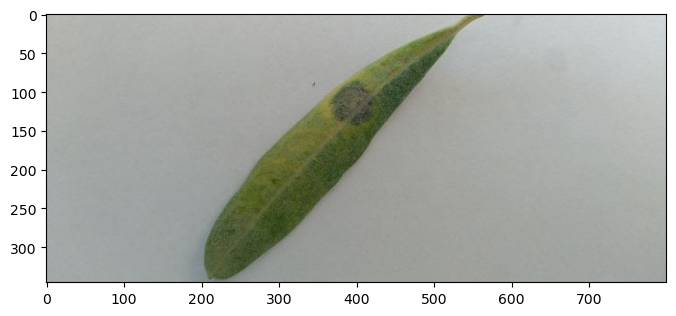

In [12]:
# STEP 1: Find the first and last row index where the sum of labels in the row is greater than 10
first_row_index = np.argmax(label_img.sum(axis=1) > 10)
last_row_index = 600 - np.argmax((label_img.sum(axis=1) > 10)[::-1])

# STEP 2: Creating a new figure with specified dimensions
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, :]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

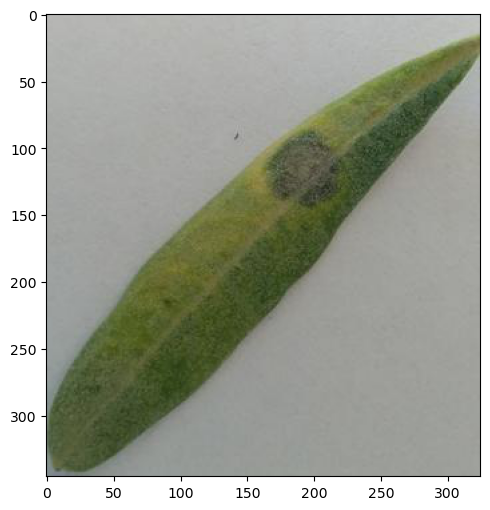

In [13]:
# STEP 3: Find the first and last column index where the sum of labels in the column is greater than 10
first_col_index = np.argmax(label_img.sum(axis=0) > 10)
last_col_index = 800 - np.argmax((label_img.sum(axis=0) > 10)[::-1])

# STEP 4: Creating a new figure for displaying the cropped image
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, first_col_index:last_col_index]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

In [14]:
# Compute the slope #

slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

slope

1.0646153846153845

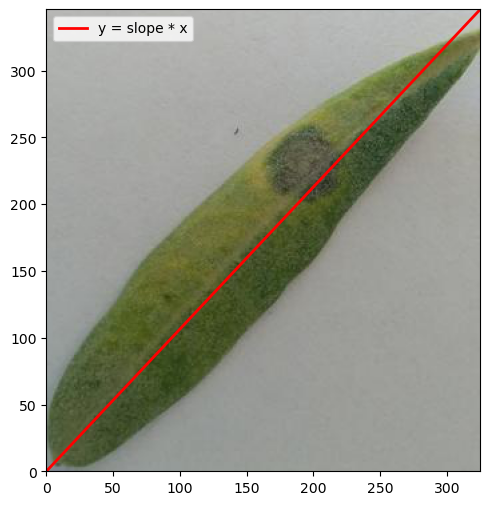

In [15]:



new_img = img_ex[first_row_index:last_row_index, first_col_index:last_col_index]

plt.figure(figsize=(10, 6))  # Adjust figure size to maintain aspect ratio

# Set extent to image's width and height to the new dimensions of the cropped image
plt.imshow(new_img, extent=[0, last_col_index - first_col_index, 0, last_row_index - first_row_index])  

# Generate x values within the width of the image
x = np.arange(0, 801)

# Calculate y values based on the given formula, expecting the line to have a "positive" orientation
y = slope * x

# Overlay the line plot on the image using the conventional coordinates
plt.plot(x, y, 'r-', linewidth=2, label='y = slope * x')  # Red line for visibility

# Set the plot limits to exactly match the image dimensions
plt.xlim([0, last_col_index - first_col_index])
plt.ylim([0, last_row_index - first_row_index])  

# Add legend
plt.legend()

# Show the plot
plt.show()

We can now proceed with building a function that we can use to iterate through the images and find the associated slope or orientation of the leaf.

#### Iterate through the three directories

First we need to find the slopes for all the images in every class. To do this, we will define a slope function `get_slope( )` that takes in an image and outputs the slope:

In [16]:
# Define the Function #
def get_slope(img):
    '''
    Takes in an RGB image array and returns the slope of the leaf's orientation in the image.
    
    Parameters:
    img (numpy.ndarray): The input image array in RGB format.
    
    Returns:
    float: The calculated slope of the leaf's orientation.
    '''
    
    # Flatten the image for KMeans
    flat_img = img.reshape(-1, 3)
    
    # Apply KMeans to segment the image
    kmeans = KMeans(n_clusters=2, random_state=123)
    kmeans.fit(flat_img)
    labels = kmeans.predict(flat_img)
    
    # Ensure the majority class is considered as the leaf
    if labels.sum() > (1-labels).sum():
        labels = 1 - labels

    # Reshape labels back to the original image shape
    label_img = labels.reshape(600,800)
    label_sum_row = label_img.sum(axis=1)
    label_sum_col = label_img.sum(axis=0)

    # Calculate first and last indices for rows and columns where the leaf is present
    first_row_index = np.argmax((label_sum_row) > 10)
    last_row_index = 600 - np.argmax(((label_sum_row) > 10)[::-1])
    first_col_index = np.argmax((label_sum_col) > 10)
    last_col_index = 800 - np.argmax(((label_sum_col) > 10)[::-1])

    # Calculate the slope
    slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

    return slope

Let's test it on a few images:

In [17]:
# SANITY CHECK #
get_slope(img_ex)

1.0646153846153845

And now we can use this function to iterate over the images in the heathy directory and store all the slopes in a list that we can later plot in a histogram. Note this will take about 10 minutes:  

In [18]:
## Find slope of leaf's orientaton for healthy leaves ##

# empty list
healthy_slopes = [] 

# for loop to iterate through images in healthy directory
for i in healthy_data:

    total = len(healthy_data) # total number of images is the length of the list of file names
    current = healthy_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/healthy/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    healthy_slopes.append(slope) # store slopes in a list
    

In [19]:
## Find slope of leaf's orientaton for healthy leaves ##

# empty list
peacock_slopes = [] 

# for loop to iterate through images in healthy directory
for i in peacock_disease_data:

    total = len(peacock_disease_data) # total number of images is the length of the list of file names
    current = peacock_disease_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/peacock_disease/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    peacock_slopes.append(slope) # store slopes in a list
    

In [20]:
## Find slope of leaf's orientaton for healthy leaves ##

# empty list
aculus_olearius_slopes = [] 

# for loop to iterate through images in healthy directory
for i in aculus_olearius_data:

    total = len(aculus_olearius_data) # total number of images is the length of the list of file names
    current = aculus_olearius_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/aculus_olearius/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    aculus_olearius_slopes.append(slope) # store slopes in a list
    

Let's plot the slopes in histograms to see whether they are similarly distributed

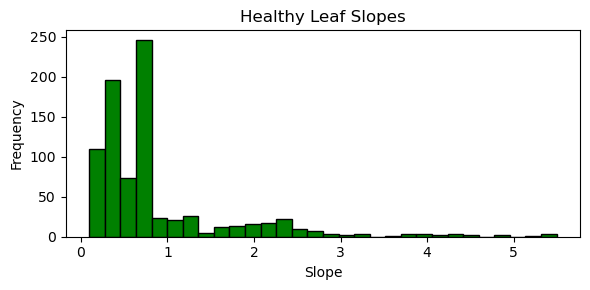

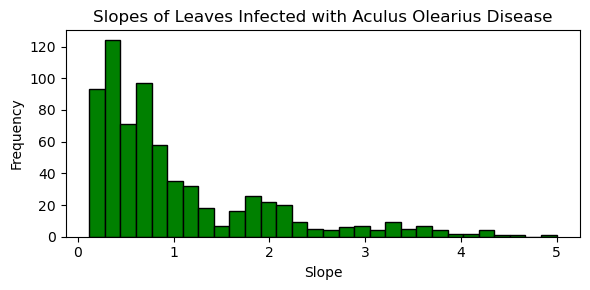

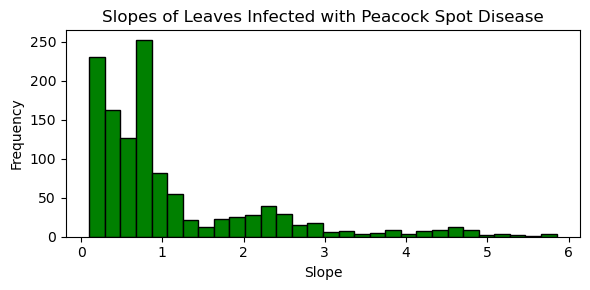

In [21]:
# Dictionary to hold the slope data and corresponding titles
slope_data = {
    'Healthy Leaf Slopes': healthy_slopes,
    'Slopes of Leaves Infected with Aculus Olearius Disease': aculus_olearius_slopes,
    'Slopes of Leaves Infected with Peacock Spot Disease': peacock_slopes
}

# Iterate over the dictionary to generate histograms for each set of slopes
for title, slopes in slope_data.items():
    plt.figure(figsize=(6, 3))  # Set the figure size
    plt.hist(slopes, bins=30, color='green', edgecolor='black')  # Generate the histogram
    plt.title(title)  # Set the title for each histogram
    plt.xlabel('Slope')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the plot

#### Observations:

- morereeee words

--- 

<a id='4.2'></a>
### Color Distribution Analysis

words about the process 

#### Color Distribution of a Sample of Images

words words

(600, 800, 3)

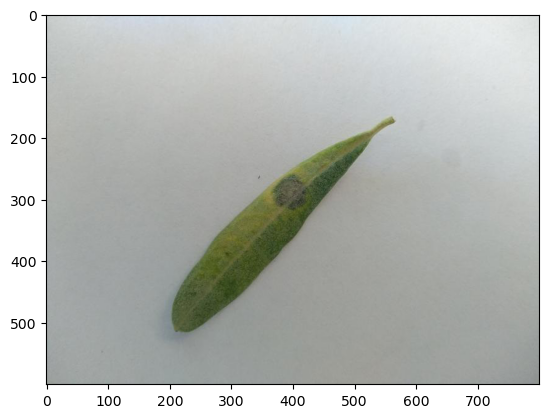

In [22]:
#########################################
## GENERATE ANY IMAGE FROM THE DATASET ##
#########################################


img_ex = mpimg.imread(dir + '/peacock_disease/' + peacock_disease_data[9]) # Read an image from the specified directory and file name

plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

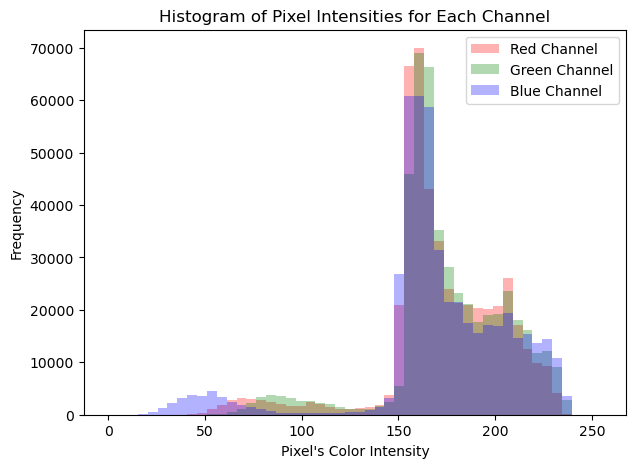

In [24]:
###########################################################
## HISTOGRAM OF PIXEL INTENSITIES FOR EACH COLOR CHANNEL ##
###########################################################

# STEP 1: Initiate some commands

channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels for clarity in plotting
rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel

plt.figure(figsize=(7, 5))  # Set figure size 


# STEP 2: 

# Loop through each channel
for i in range(3):
    # Extract the current channel's pixel intensities
    channel_data = img_ex[:, :, i].ravel()
    # Generate histogram for the current channel
    plt.hist(channel_data, bins=np.linspace(0, 255, 51), color=rgb_channels[i], alpha=0.3, label=channel_titles[i])


# STEP 3: Adding labels and title to the plot

plt.xlabel("Pixel's Color Intensity") # x-label
plt.ylabel("Frequency") # y-label
plt.title("Histogram of Pixel Intensities for Each Channel") # Setting title 

plt.legend() # Adding a legend to differentiate the channels

plt.show() # Display the combined plot


#### Color Distribution Analysis Across Classses

wordy wordy word


Processing Healthy Leaves... Total images: 831
Could not load image .DS_Store: cannot identify image file 'dataset/healthy/.DS_Store'
Processing image 831/831 in Healthy Leaves.
Finished processing images in Healthy Leaves


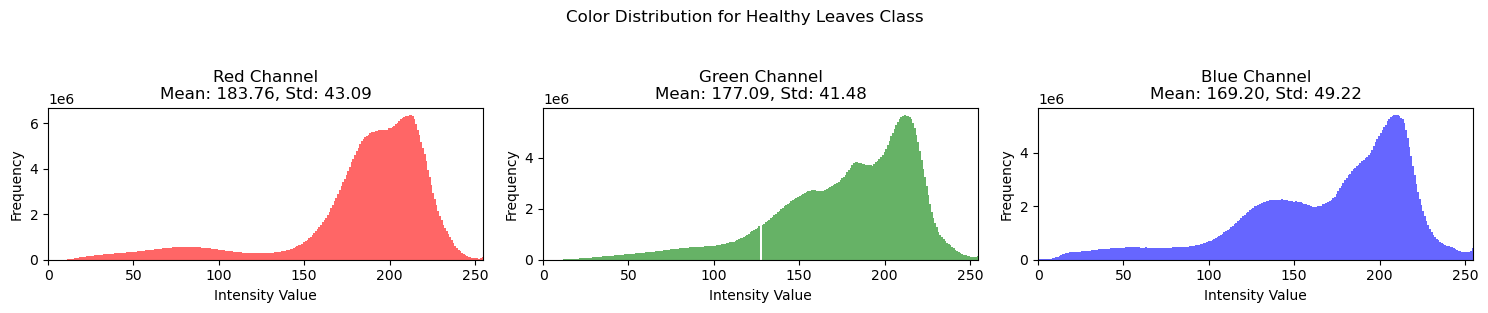


Processing Aculus Olearius Infected Leaves... Total images: 690
Processing image 690/690 in Aculus Olearius Infected Leaves.
Finished processing images in Aculus Olearius Infected Leaves


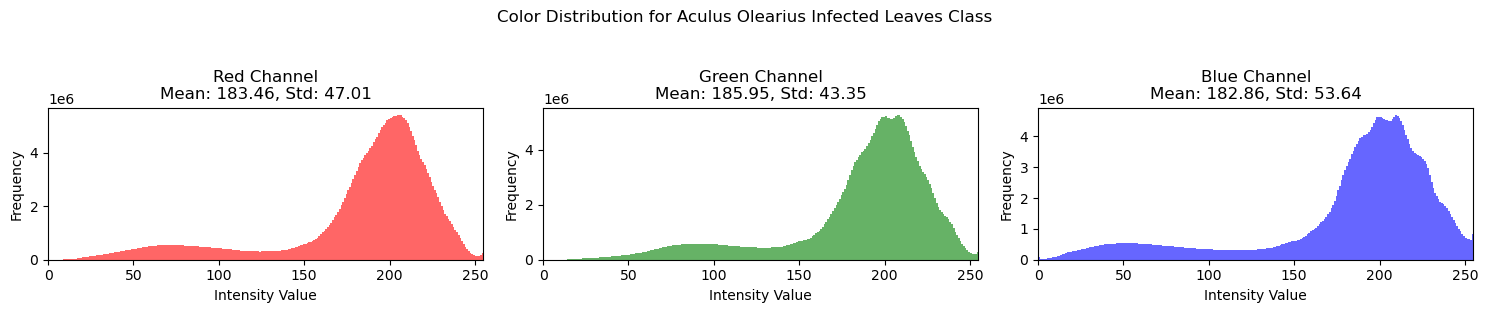


Processing Peacock Disease Infected Leaves... Total images: 1201
Could not load image .DS_Store: cannot identify image file 'dataset/peacock_disease/.DS_Store'
Processing image 1201/1201 in Peacock Disease Infected Leaves.
Finished processing images in Peacock Disease Infected Leaves


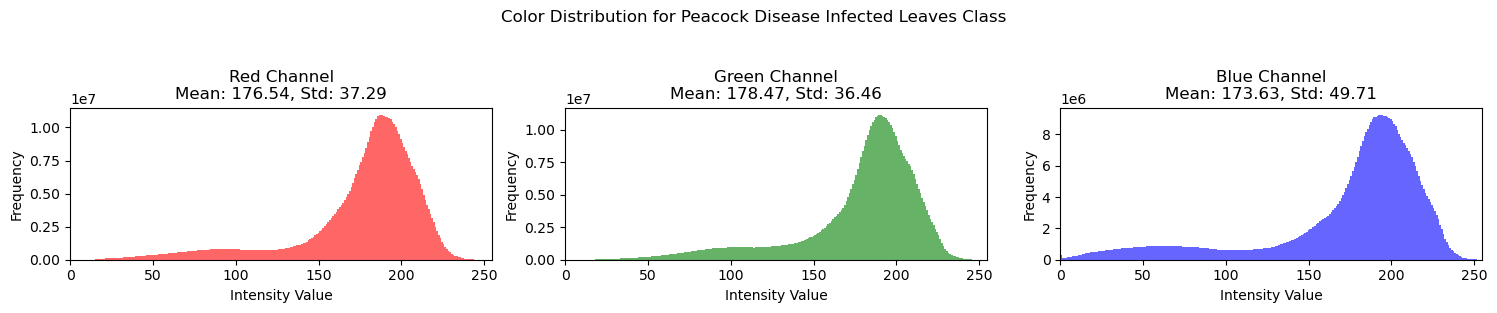

In [25]:
## 

## STEP 1: 

class_directories = {
    'Healthy Leaves': os.path.join(dir, 'healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Infected Leaves': os.path.join(dir, 'aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Infected Leaves': os.path.join(dir, 'peacock_disease') # Path to the directory containing images with Peacock Spot Leaves
}

rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels for clarity in plotting


## STEP 2: 
for class_name, directory in class_directories.items():
    # Initialize a list to store all channel values for the current class
    all_channel_values = [[], [], []]  # List of lists for red, green, blue channels
    
    # Get a list of all image files in the directory
    image_files = os.listdir(directory)
    total = len(image_files)  # Total number of images
    
    print(f"\nProcessing {class_name}... Total images: {total}")

    # Iterate over each image file in the directory
    for current, img_file in enumerate(image_files, 1):  # Start enumeration from 1
        img_path = os.path.join(directory, img_file)
       
        try:
            img = mpimg.imread(img_path)  # Load the image
        except Exception as e:
            print(f"Could not load image {img_file}: {e}")
            continue
        
        # Accumulate channel values
        for i in range(3):  # Loop through each RGB channel
            all_channel_values[i].extend(img[:, :, i].ravel())
        
        # Enhanced progress indicator
        print(f"Processing image {current}/{total} in {class_name}.", end="\r", flush=True)

    # Clear the progress line
    print("\nFinished processing images in " + class_name)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Color Distribution for {class_name} Class')

    for i, color in enumerate(rgb_channels):
        channel_values_flat = np.array(all_channel_values[i])  # Convert to numpy array for analysis
        
        # Calculate statistics
        mean_val = np.mean(channel_values_flat)
        std_val = np.std(channel_values_flat)
        
        plt.subplot(2, 3, i+1)
        plt.hist(channel_values_flat, bins=256, color=color, alpha=0.6)
        plt.title(f'{channel_titles[i]}\nMean: {mean_val:.2f}, Std: {std_val:.2f}')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])

    
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



Processing Healthy Leaves... Total images: 831
Processing image 113/831 [████--------------------------] 13%
Could not load image .DS_Store: cannot identify image file 'dataset/healthy/.DS_Store'
Processing image 831/831 [██████████████████████████████] 100%

Finished processing images in Healthy Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


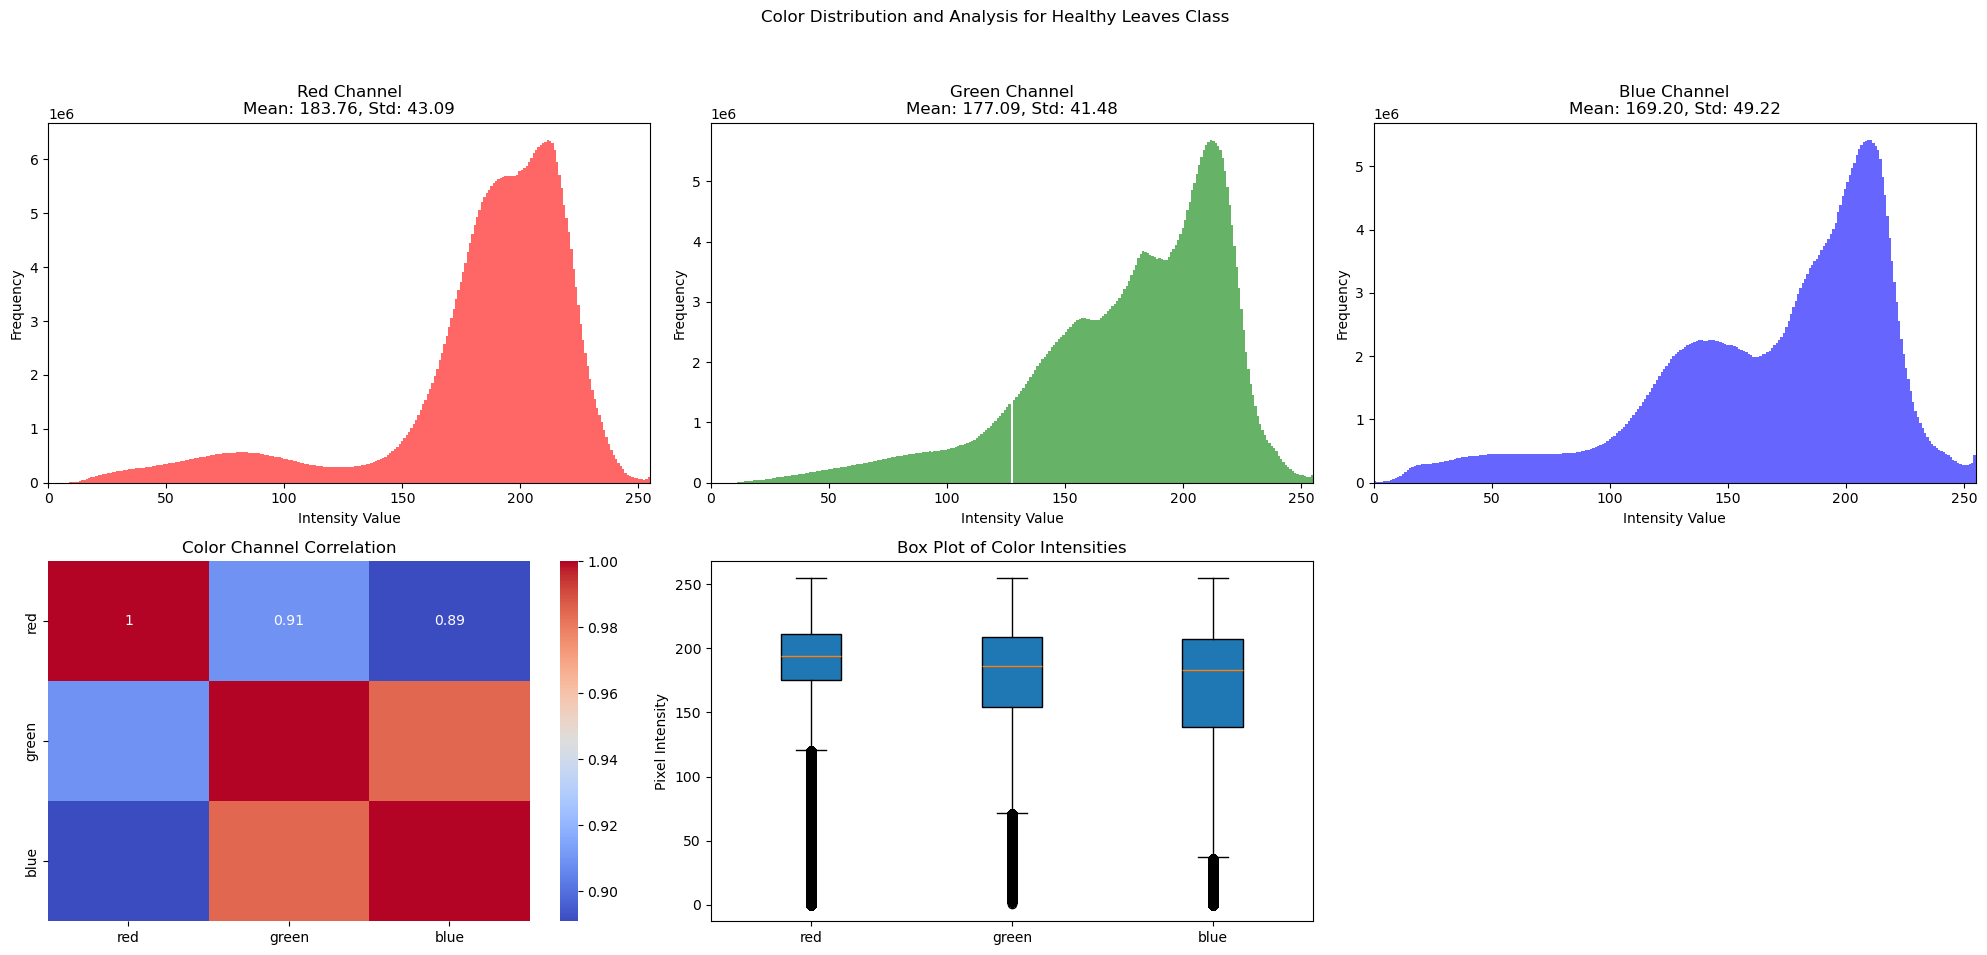


Processing Aculus Olearius Infected Leaves... Total images: 690
Processing image 690/690 [██████████████████████████████] 100%

Finished processing images in Aculus Olearius Infected Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


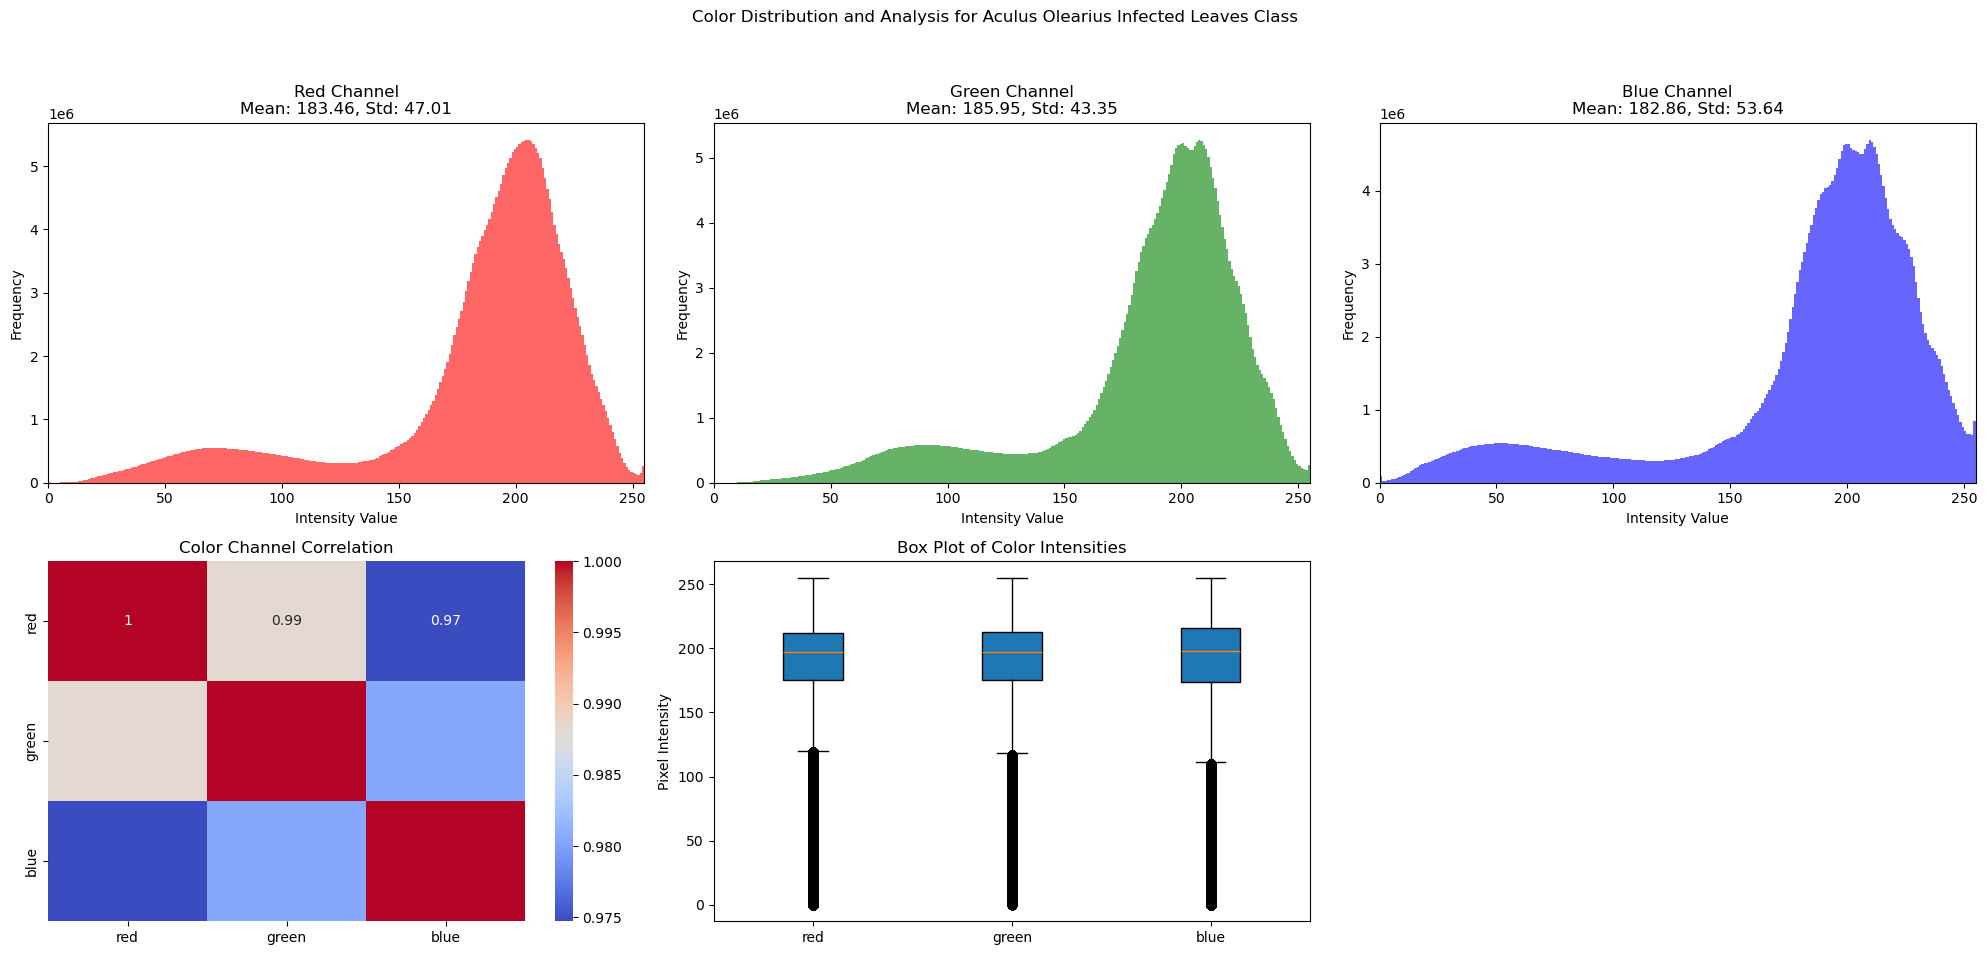


Processing Peacock Disease Infected Leaves... Total images: 1201
Processing image 184/1201 [████--------------------------] 15%
Could not load image .DS_Store: cannot identify image file 'dataset/peacock_disease/.DS_Store'
Processing image 1201/1201 [██████████████████████████████] 100%

Finished processing images in Peacock Disease Infected Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


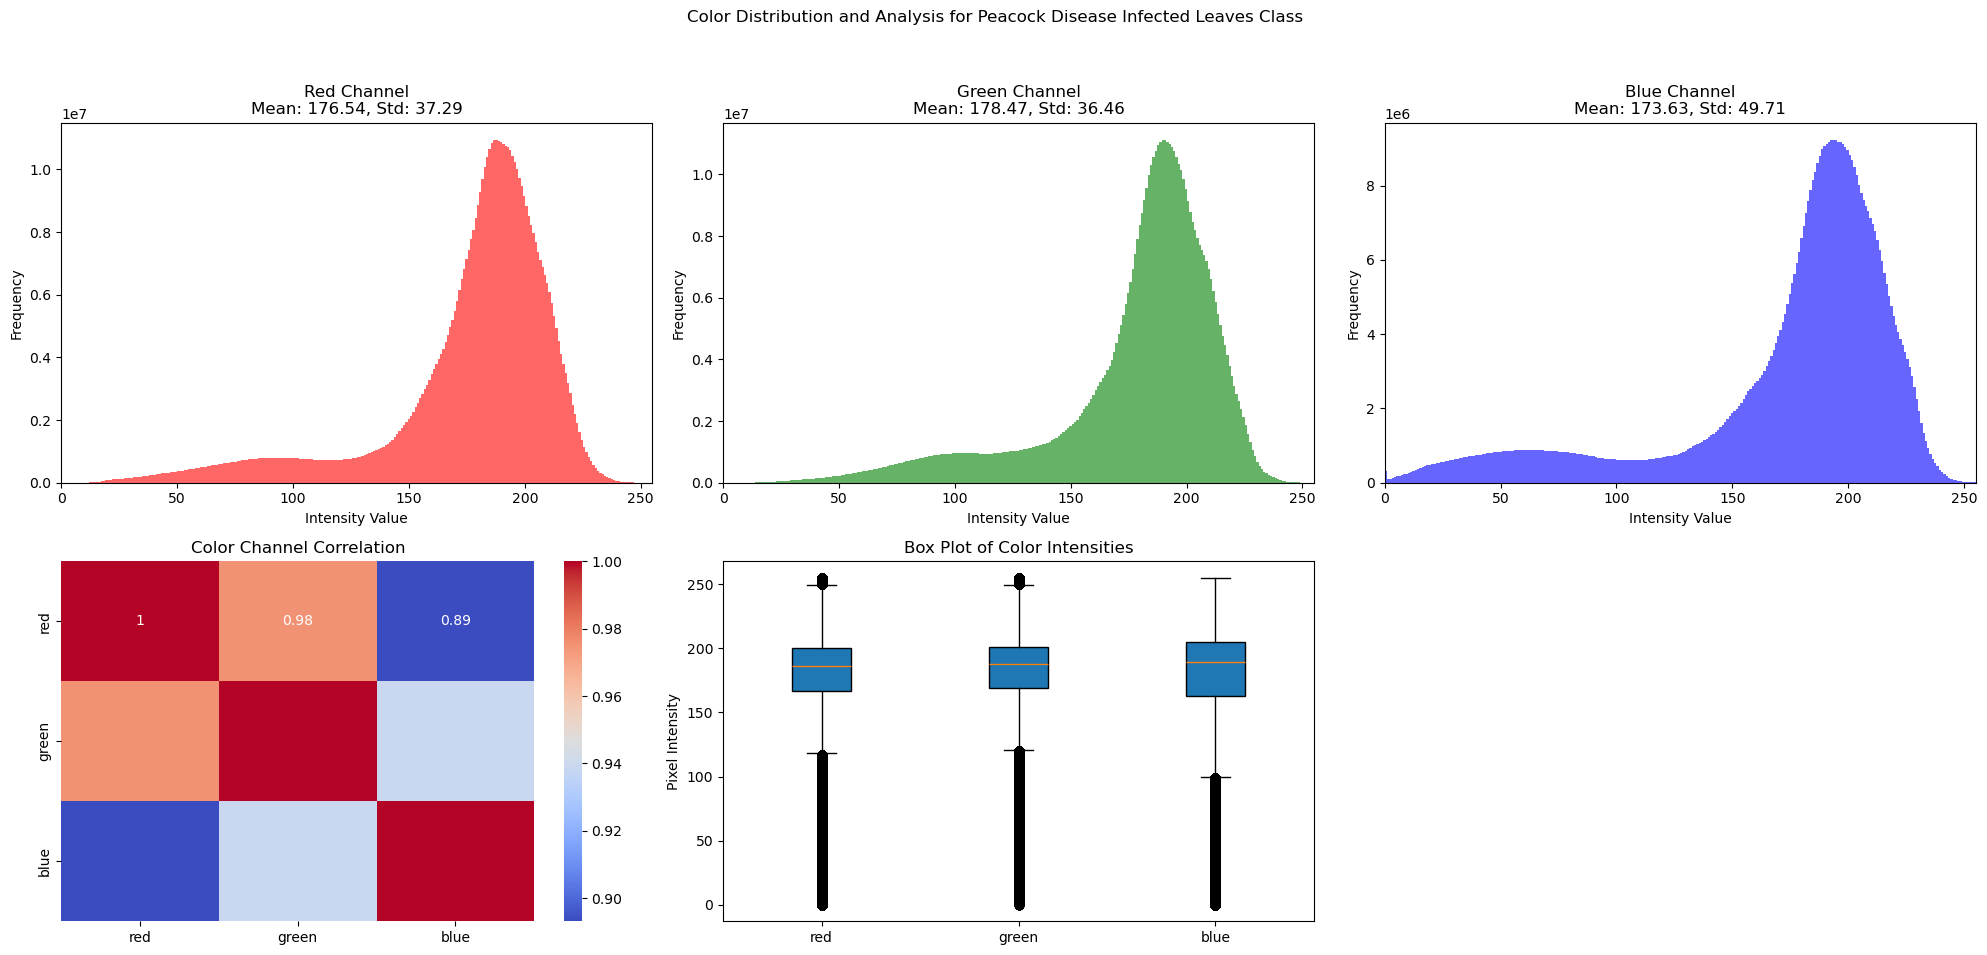

In [28]:

class_directories = {
    'Healthy Leaves': os.path.join(dir, 'healthy'),
    'Aculus Olearius Infected Leaves': os.path.join(dir, 'aculus_olearius'),
    'Peacock Disease Infected Leaves': os.path.join(dir, 'peacock_disease')
}

rgb_channels = ['red', 'green', 'blue']
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for class_name, directory in class_directories.items():
    all_channel_values = [[], [], []]  # Initialize for red, green, blue channels
    image_files = os.listdir(directory)  # Get all image files
    total = len(image_files)  # Total number of images
    
    print(f"\nProcessing {class_name}... Total images: {total}")

    for current, img_file in enumerate(image_files, 1):
        img_path = os.path.join(directory, img_file)
        try:
            img = mpimg.imread(img_path)
        except Exception as e:
            print(f"\nCould not load image {img_file}: {e}")
            continue
        
        for i in range(3):  # Accumulate channel values
            all_channel_values[i].extend(img[:, :, i].ravel())
        
        # Update the progress bar
        progress = int((current / total) * 100)  # Calculate progress percentage
        bar_length = 30  # You can adjust this to make the progress bar longer or shorter
        filled_length = int(bar_length * current // total)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)
        print(f'\rProcessing image {current}/{total} [{bar}] {progress}%', end="\r", flush=True)
        if current == total:
            print()  # Move to the next line when done
    
    print("\nFinished processing images in " + class_name)

    plt.figure(figsize=(20, 10))  # Adjust the size to fit all plots
    plt.suptitle(f'Color Distribution and Analysis for {class_name} Class')

    # Plotting the histograms
    print("Starting histogram plots...")
    for i, color in enumerate(rgb_channels):
        print(f"Plotting {channel_titles[i]} histogram...")
        channel_values_flat = np.array(all_channel_values[i])
        mean_val = np.mean(channel_values_flat)
        std_val = np.std(channel_values_flat)
        
        plt.subplot(2, 3, i+1)
        plt.hist(channel_values_flat, bins=256, color=color, alpha=0.6)
        plt.title(f'{channel_titles[i]}\nMean: {mean_val:.2f}, Std: {std_val:.2f}')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])
    print("Histogram plots completed.")

    # Calculate and plot the correlation matrix
    print("Starting correlation matrix plot...")
    corr_matrix = np.corrcoef([all_channel_values[0], all_channel_values[1], all_channel_values[2]])
    plt.subplot(2, 3, 4)  # Position for the correlation heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=rgb_channels, yticklabels=rgb_channels)
    plt.title('Color Channel Correlation')
    print("Correlation matrix plot completed.")

    # Adding Box Plot
    print("Starting box plot...")
    plt.subplot(2, 3, 5)  # Adjust subplot position for the box plot
    box_plot_data = [np.array(all_channel_values[i]) for i in range(3)]
    plt.boxplot(box_plot_data, patch_artist=True, labels=rgb_channels)
    plt.title('Box Plot of Color Intensities')
    plt.ylabel('Pixel Intensity')
    print("Box plot completed.")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

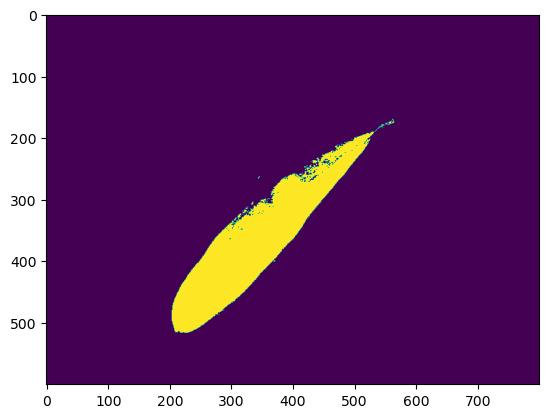

In [29]:
plt.imshow(img_ex[:,:,1] < 125)
plt.show()

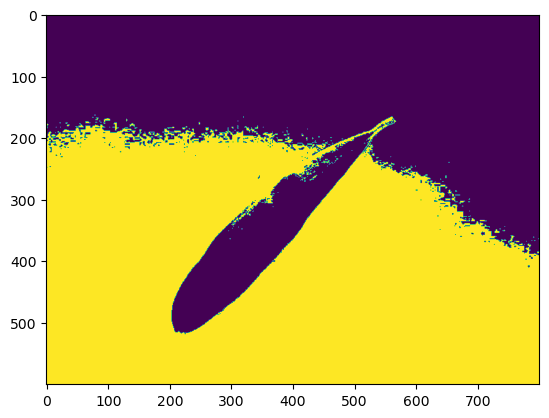

In [30]:
plt.imshow((125 < img_ex[:,:,1]) & (img_ex[:,:,1] < 180))

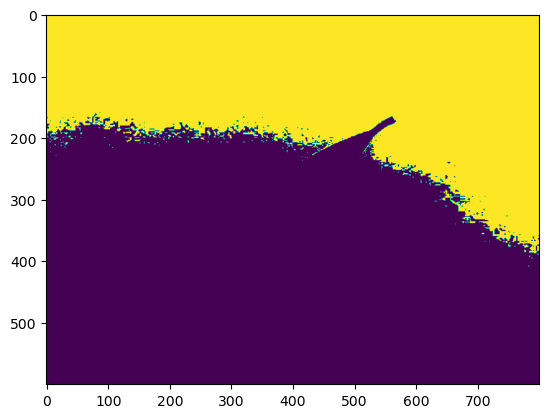

In [31]:
plt.imshow((img_ex[:,:,1] > 180))

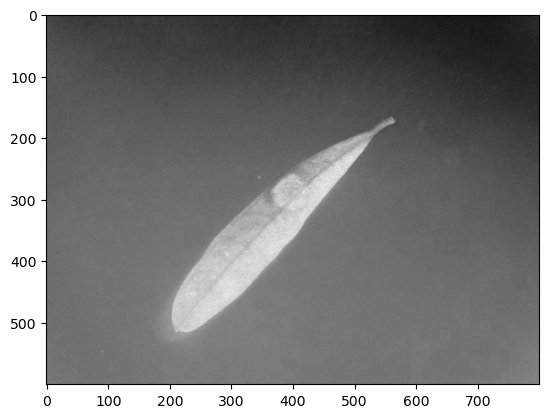

In [32]:
plt.imshow(img_ex[:,:,0], cmap = 'Greys', vmin=0, vmax=255)
plt.show()

<a id='4.2.1'></a>
#### Observations:
- words words

### Key Insights of the EDA Stage

<hr>

*PART II: Data Analysis* 

<a id='model_eval'></a>
## Modeling and Evaluation

words words


### Logistic Regression

#### Import Libraries

In [33]:
# Import Libraries

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

#### Instantiate and Fit the Model

In [34]:
# HEALTHY 
# create empty list for the concatenated counts - big list

big_list = []

for i in healthy_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/healthy/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins = np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
    
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [35]:
# JOIN THE LARGE ARRAY

healthy_hist = np.stack(big_list)
healthy_label = np.full(healthy_hist.shape[0], 0)

In [36]:
# SANITY CHECK

healthy_hist, healthy_label

(array([[   79,   356,  1699, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ..., 40886, 38938, 26438],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     3, ...,     0,     0,     0]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Now, we'll do the same for the other two classes.

In [37]:
# ACULUS OLEARIUS
# create empty list for the concatenated counts - big list

big_list = []

for i in aculus_olearius_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/aculus_olearius/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [38]:
# SANITY CHECK

aculus_olearius_hist = np.stack(big_list)
aculus_olearius_label = np.full(aculus_olearius_hist.shape[0], 1)

aculus_olearius_hist.shape

(690, 150)

In [39]:
# PEACOCK DISEASE 
# create empty list for the concatenated counts - big list

big_list = []

for i in peacock_disease_data:
    print("Working on: ", i, end = "\r")
    try:
        img = mpimg.imread(dir + '/peacock_disease/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [40]:
peacock_disease_hist = np.stack(big_list)
peacock_disease_label = np.full(peacock_disease_hist.shape[0], 2)

peacock_disease_hist.shape

(1200, 150)

In [41]:
# SANITY CHECK

x = np.concatenate([healthy_hist, aculus_olearius_hist, peacock_disease_hist])
y = np.concatenate([healthy_label,aculus_olearius_label,peacock_disease_label])

x.shape,y.shape

((2720, 150), (2720,))

In [42]:
# Logistic Regression

model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

#### Accuracy Score

In [43]:
# Accuracy Score

model.score(x,y)

0.7658088235294118

#### Classification Report 

In [44]:
# Classification Report

report_initial = classification_report(y, model.predict(x))
print(report_initial)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       830
           1       0.70      0.66      0.68       690
           2       0.79      0.85      0.82      1200

    accuracy                           0.77      2720
   macro avg       0.76      0.75      0.75      2720
weighted avg       0.76      0.77      0.76      2720



#### Confusion Matrix

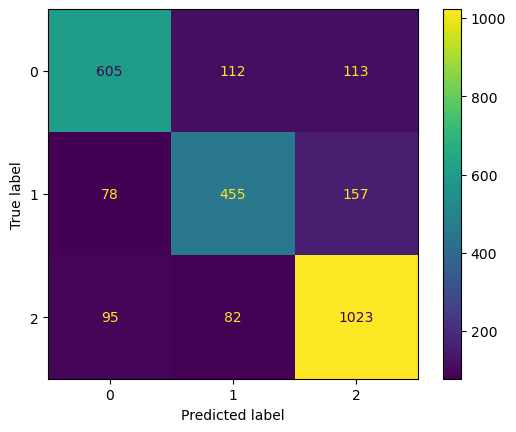

In [45]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(model, x, y)

In [46]:
 import plotly.express as px

<hr>

*PART III: Findings* 

<a id='results'></a>
## Results

more wordsssssssss

<hr>

*PART III: Findings* 

<a id='discussion'></a>
## Discussion

wordssssssss


<hr>

*PART III: Findings* 

<a id='conclusion'></a>
## Conclusion

yup words.